In [1]:
import numpy as np
import pandas as pd

In [2]:
# pip install opencv-python

In [3]:
# pip install opencv-contrib-python

In [4]:
import os
for dirname, _, filenames in os.walk('C:/Users/cnkum/OneDrive/Documents/Medical_Diagnosis-main/Dataset/chest_xray'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [5]:
import os
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

In [6]:
def extract_hog_features(image):
    hog=cv2.HOGDescriptor()
    hog_features = hog.compute(image)
    return hog_features.flatten()

In [7]:
labels=['PNEUMONIA','NORMAL']
img_size=128
def get_data(dir):
    features_list=[]
    labels_list=[]
    for label in labels:
        path = os.path.join(dir,label)
        class_label=labels.index(label)
        for image in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,image), cv2.IMREAD_GRAYSCALE)
                # print(img_arr)
                img_resized = cv2.resize(img_arr,(img_size,img_size))
                hog_features=extract_hog_features(img_resized)
                features_list.append(hog_features)
                labels_list.append(class_label)
            except Exception as e:
                print(e)
    return np.array(features_list),np.array(labels_list)

In [8]:
train_features_array, train_labels_array = get_data('C:/Users/cnkum/OneDrive/Documents/Medical_Diagnosis-main/Dataset/chest_xray/chest_xray/train')
test_features_array, test_labels_array = get_data('C:/Users/cnkum/OneDrive/Documents/Medical_Diagnosis-main/Dataset/chest_xray/chest_xray/test')

OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [9]:
print(train_features_array.shape)
print(train_labels_array.shape)
print(test_features_array.shape)
print(test_labels_array.shape)

(5216, 34020)
(5216,)
(624, 34020)
(624,)


In [10]:
lr_pipeline=Pipeline([
    ('pca',PCA(n_components=2100,random_state=42)),
    ('classifier',LogisticRegression(max_iter=1000,random_state=42))
])
lr_pipeline.fit(train_features_array,train_labels_array)

Pipeline(steps=[('pca', PCA(n_components=2100, random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [11]:
predictions = lr_pipeline.predict(test_features_array)
accuracy = accuracy_score(test_labels_array, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7436


In [12]:
report = classification_report(test_labels_array, predictions, output_dict=True,zero_division=1)

# Convert the report to a pandas DataFrame for better visualization
report = pd.DataFrame(report).transpose()

print(report)

              precision    recall  f1-score    support
0              0.709854  0.997436  0.829424  390.00000
1              0.986842  0.320513  0.483871  234.00000
accuracy       0.743590  0.743590  0.743590    0.74359
macro avg      0.848348  0.658974  0.656648  624.00000
weighted avg   0.813725  0.743590  0.699842  624.00000


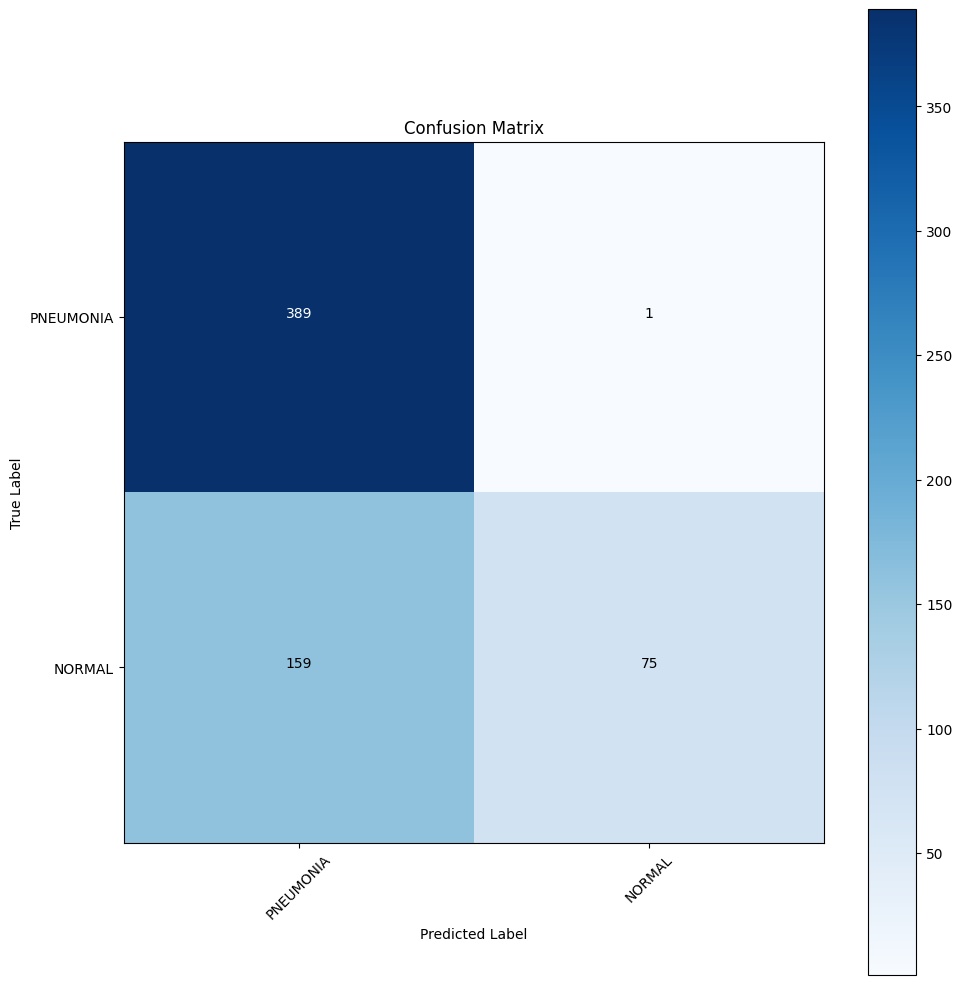

In [13]:
cm = confusion_matrix(test_labels_array, predictions)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation= 45)
plt.yticks(tick_marks, labels)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


plt.show()